<a href="https://colab.research.google.com/github/jvataidee/SpatialDataSience/blob/master/Estimativa_evapo_transpiracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://static.wixstatic.com/media/bdd7cb_6ecb6c85550043f090237e5943d2647c~mv2.png/v1/fill/w_417,h_88,al_c,q_85,usm_0.66_1.00_0.01/Ativo%2023-8.webp)

# ESTIMATIVA DA EVAPOTRANSPIRAÇÃO

Esta foi uma atividade da Especialização em Geoprocessamento e Georreferenciamento. Neste projeto, foi utilizados dados de 42 estações meteorológicas do estado de Minas Gerais/BR. Para que possamos estimar a evapotranspiração (ETo) do estado.

*OBS: Este código foi feito com uma adapatção de kernel do google colab para rodar os codigos em R*

In [ ]:
install.packages("geoR")
install.packages("splancs")
install.packages("e1071")

In [ ]:
library(geoR)
library(e1071)
library(splancs)

In [ ]:
dados = read.geodata(file =  "anual.txt", sep = ' ', header = T)
dados

$coords
      Coordenada_X Coordenada_Y
 [1,]    1779363.1      1866667
 [2,]    1917183.0      1743463
 [3,]    1644171.3      1691338
 [4,]    1824790.9      1653488
 [5,]    1334213.4      1663299
 [6,]    1732933.9      1549995
 [7,]    1866684.0      1534184
 [8,]    1048687.8      1515874
 [9,]    1355469.9      1500911
[10,]    1652439.3      1512304
[11,]    1811659.5      1424039
[12,]    1500722.7      1414913
[13,]    1204360.5      1379653
[14,]    1304633.6      1392301
[15,]    1754715.3      1878732
[16,]    1394579.9      1334039
[17,]    1572480.5      1378406
[18,]    1598646.2      1321875
[19,]    1659615.0      1420473
[20,]    1888319.0      1340905
[21,]    1585652.0      1312729
[22,]    1794456.3      1230586
[23,]    1694857.4      1215287
[24,]    1382474.5      1139880
[25,]    1477593.9      1182225
[26,]    1598063.9      1167414
[27,]    1414037.7      1565444
[28,]    1632604.6      1102693
[29,]    1465614.1      1081517
[30,]    1776723.5      1317055


##Estatística Descritiva:

In [ ]:
summary(dados)

Number of data points: 42 

Coordinates summary
    Coordenada_X Coordenada_Y
min     821383.9      1013691
max    2032323.2      2004230

Distance summary
       min        max 
  15890.42 1254271.48 

Data summary
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 798.245 1030.368 1123.217 1123.316 1188.296 1510.332 

Other elements in the geodata object
[1] "call"

In [ ]:
#Desvio padrão
sd(dados$data)

[1] 132.8226

In [ ]:
#Variância
var(dados$data)

[1] 17641.83

In [ ]:
#moda
getmode = function(v) {
  uniqv = unique(v)
  uniqv[which.max(tabulate(match(v, uniqv)))]
}
moda = getmode(dados$data)
moda

[1] 1367.734

In [ ]:
#simetria
skewness(dados$data)

[1] 0.5129477

In [ ]:
#Curtose
kurtosis(dados$data)

[1] 0.8814792

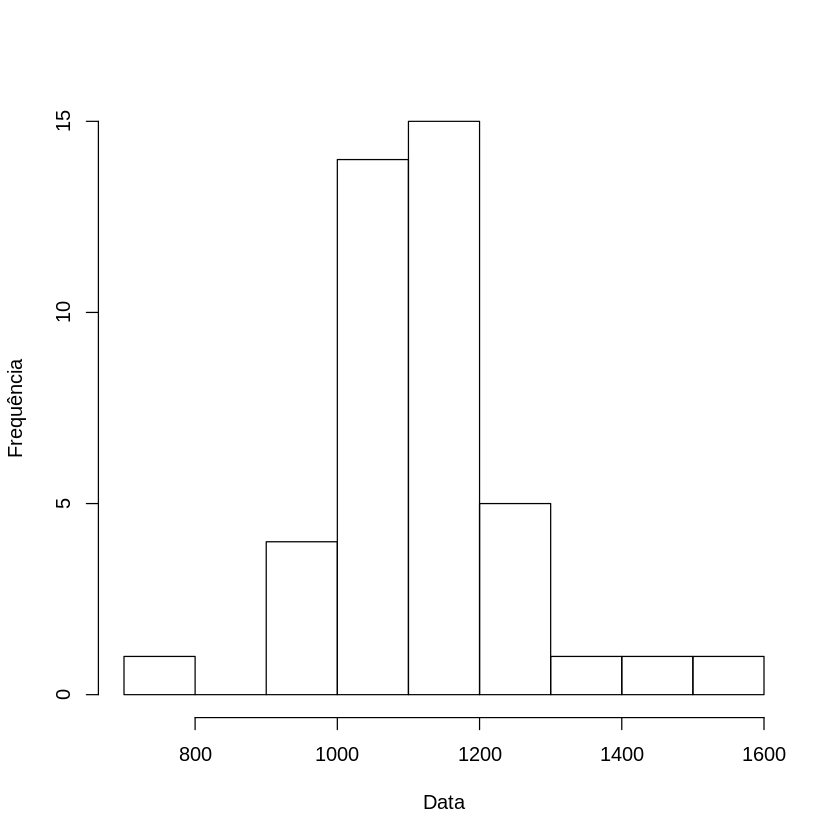

In [ ]:
#Histograma
hist(dados$data, main = NULL, xlab = 'Data', ylab = 'Frequência')

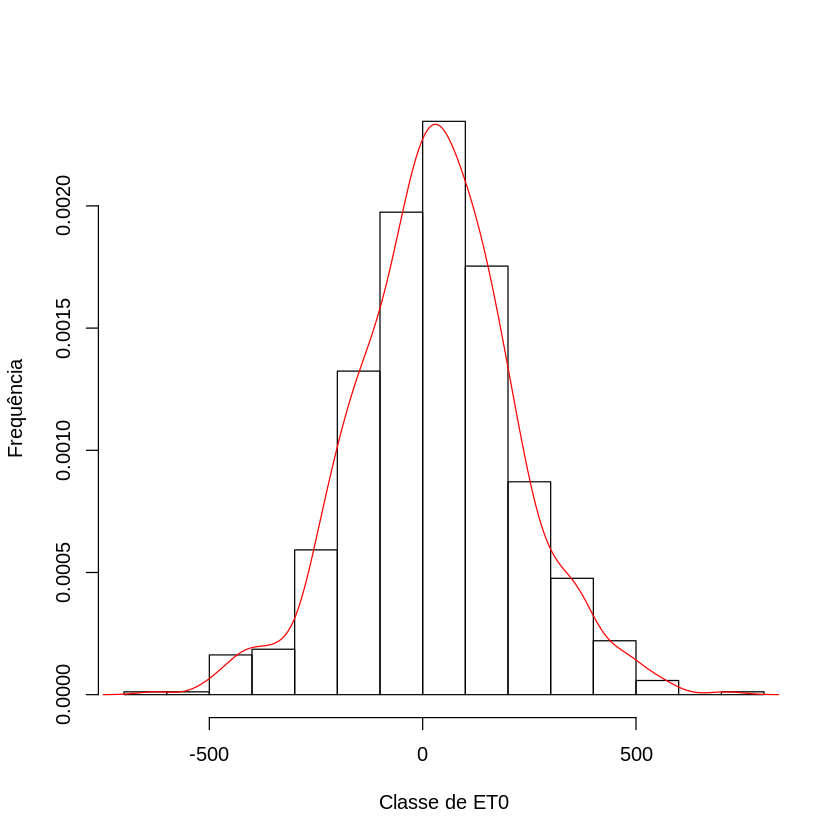

In [ ]:
#Histograma com curva normal
dif = diffpairs(dados$coords, dados$data)
hist(dif$dif, xlab = 'Classe de ET0', ylab = 'Frequência',, main = NULL, prob = T)
dados.d = density(dif$diff)
lines(dados.d, col = "red")

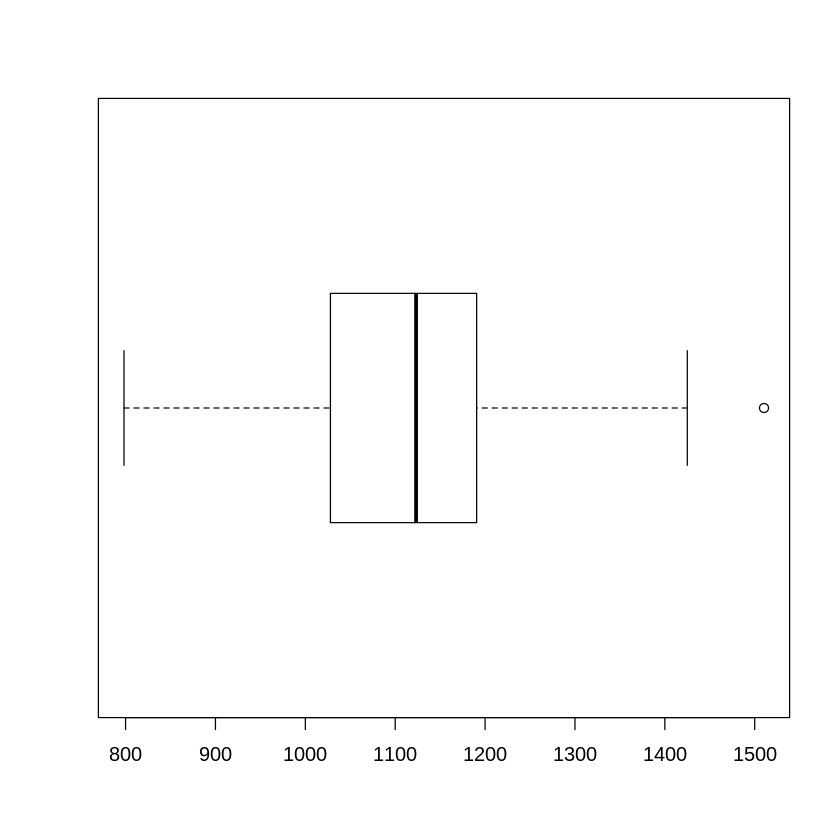

In [ ]:
#box plot
boxplot(dados$data, horizontal=TRUE)

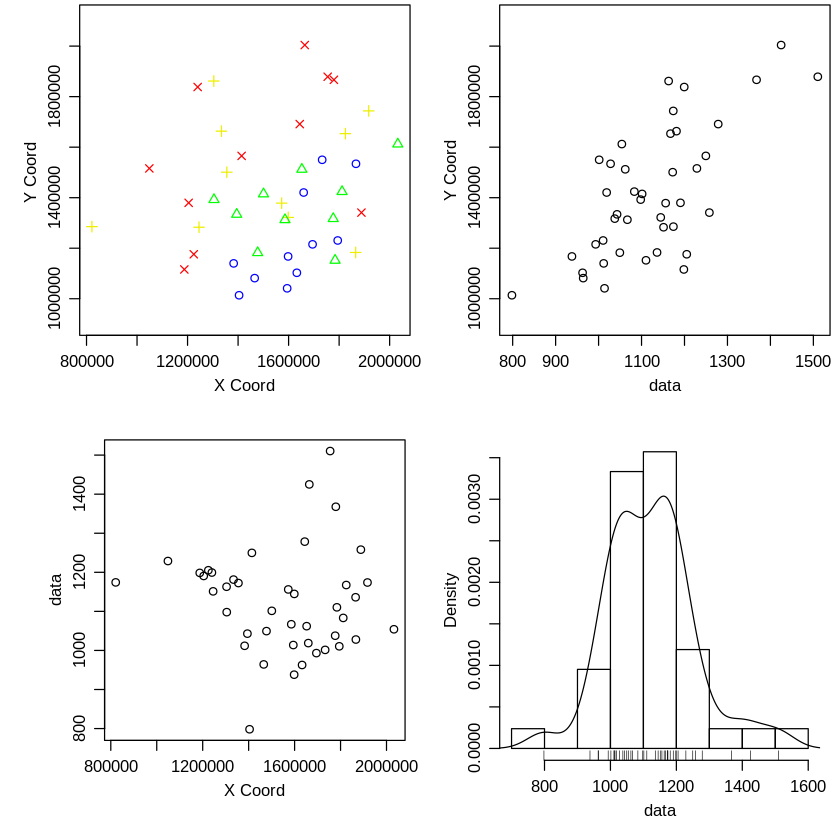

In [ ]:
plot(dados)

In [ ]:
#Teste de Shapiro-Wilk:
shapiro.test(dados$data)


	Shapiro-Wilk normality test

data:  dados$data
W = 0.96282, p-value = 0.1862


In [ ]:
Variogáfica Semivariograma empírico ou experimental:

#Variogáfica Semivariograma empírico ou experimental:

In [ ]:
binET0 = variog(dados,uvec = 12,max.dist = 1000000, pairs.min = 10)

variog: computing omnidirectional variogram


In [ ]:
#semivariograma para cada modelo
ml = likfit(dados,  ini = c(17000, 267000), nugget = 0, cov.model = 'exponential')
ml1 = likfit(dados, ini = c(17000, 267000), nugget = 0, cov.model = 'spherical')
ml2 = likfit(dados, ini = c(17000, 267000), nugget = 0, cov.model = 'gauss')

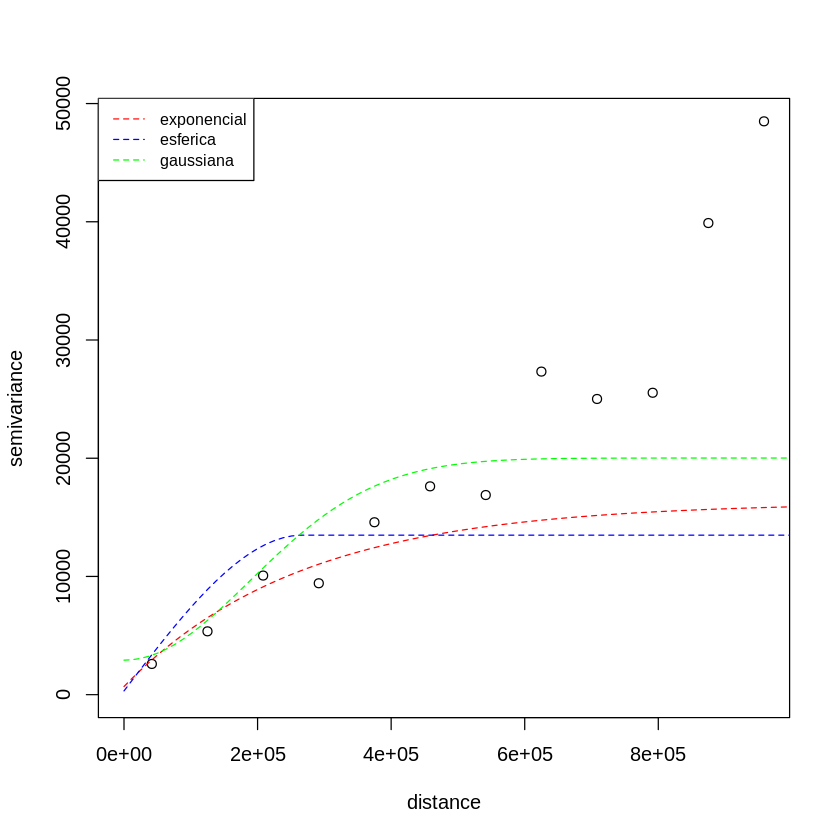

In [ ]:
plot(binET0)
lines(ml, type = 'l', lty = 2, lwd = 1,  col = "red")
lines(ml1, type = 'l', lty = 2, lwd = 1,  col = "blue",)
lines(ml2, type = 'l', lty = 2, lwd = 1,  col = "green")
legend("topleft", legend = c("exponencial", "esferica","gaussiana" ),
       col = c("red", "blue", "green"), lty=2, cex=0.8)

##Semivariograma modelado máxima verossimilhança

In [ ]:
rl = variofit (binET0, ini = c(17000, 267000), nugget = 0, cov.model = 'exponential')
rl1 = variofit (binET0, ini = c(17000, 267000), nugget = 0, cov.model = 'spherical')
rl2 = variofit (binET0, ini = c(17000, 267000), nugget = 0, cov.model = 'gauss')

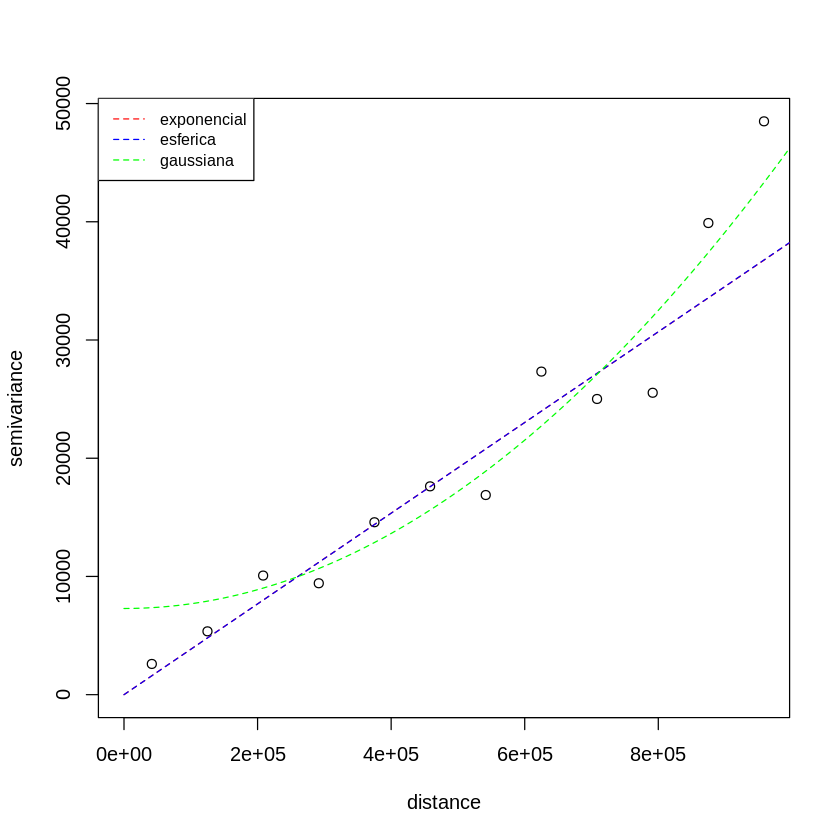

In [ ]:
plot(binET0)
lines(rl, type = 'l', lty = 2, lwd = 1,  col = "red",)
lines(rl1, type = 'l', lty = 2, lwd = 1,  col = "blue",)
lines(rl2, type = 'l', lty = 2, lwd = 1,  col = "green")
legend("topleft", legend = c("exponencial", "esferica","gaussiana" ),
       col = c("red", "blue", "green"), lty=2, cex=0.8)

##Validação cruzada (estima os valores e compara com real)

In [ ]:
valid_ml = xvalid(dados, model = ml)
valid_ml1 = xvalid(dados, model = ml1)
valid_ml2 = xvalid(dados, model = ml2)
valid_rl = xvalid(dados, model = rl)
valid_rl1 = xvalid(dados, model = rl1)
valid_rl2 = xvalid(dados, model = rl2)

In [ ]:
#exportando validação cruzada
write.csv(valid_ml$data, file = "validação1")
write.csv(valid_ml1$data, file = "validação2")
write.csv(valid_ml2$data, file = "validação3")
write.csv(valid_rl$data, file = "validação11")
write.csv(valid_rl1$data, file = "validação21")
write.csv(valid_rl2$data, file = "validação31")

##Krigagem novo pacote

In [ ]:
limite = read.table(file = "areaminas.txt", header = T)
names(limite)

[1] "Coord.X" "Coord.Y"

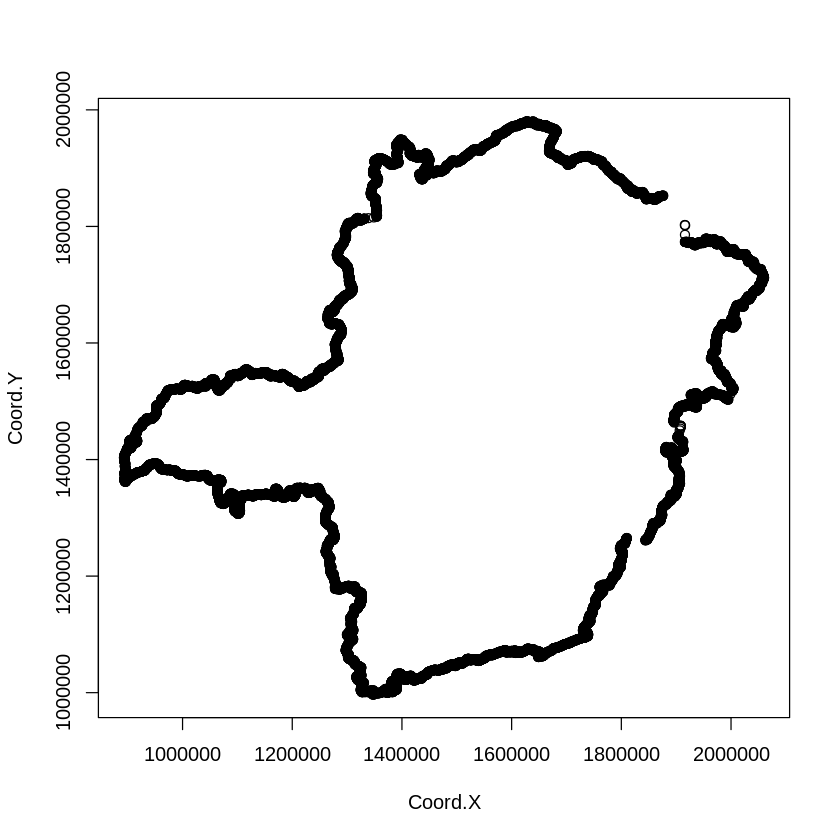

In [ ]:
plot(limite)

In [ ]:
loci = expand.grid( seq( 800000, 2500000, l = 100), seq(800000, 2000000, l = 100))

In [ ]:
#modelo gaussiano escolhido
kc = krige.conv(dados, loc = loci, border = limite, krige = krige.control(obj = ml))

krige.conv: results will be returned only for prediction locations inside the borders
krige.conv: model with constant mean
krige.conv: Kriging performed using global neighbourhood 


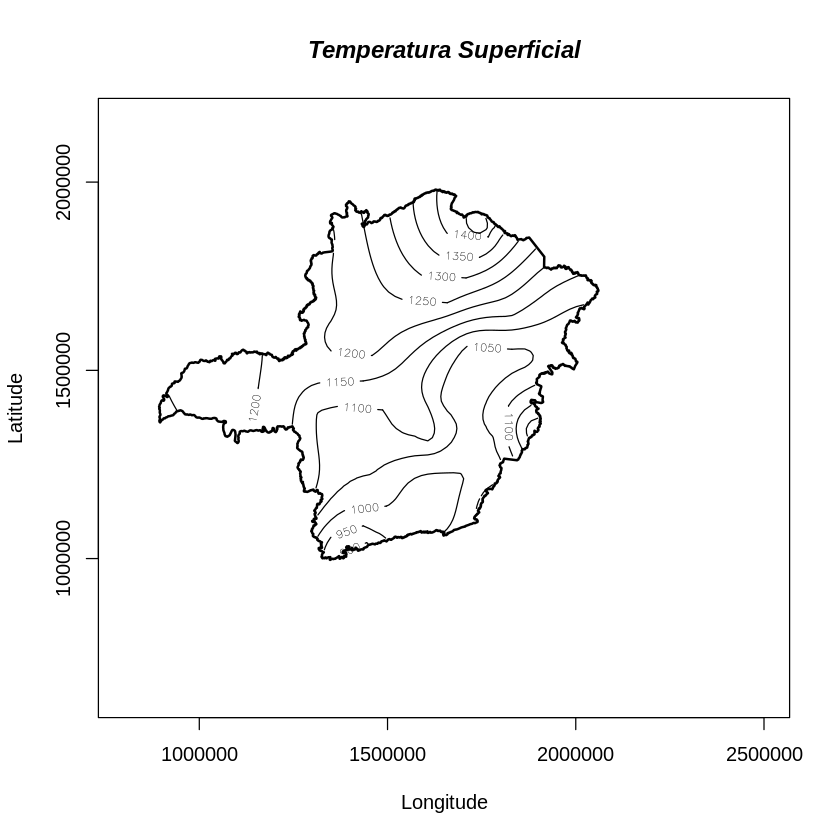

In [ ]:
#mapa de krigagem com curvas de nível
contour( kc, xlab = 'Longitude', ylab = 'Latitude')
title(main = "Temperatura Superficial", font.main = 4)

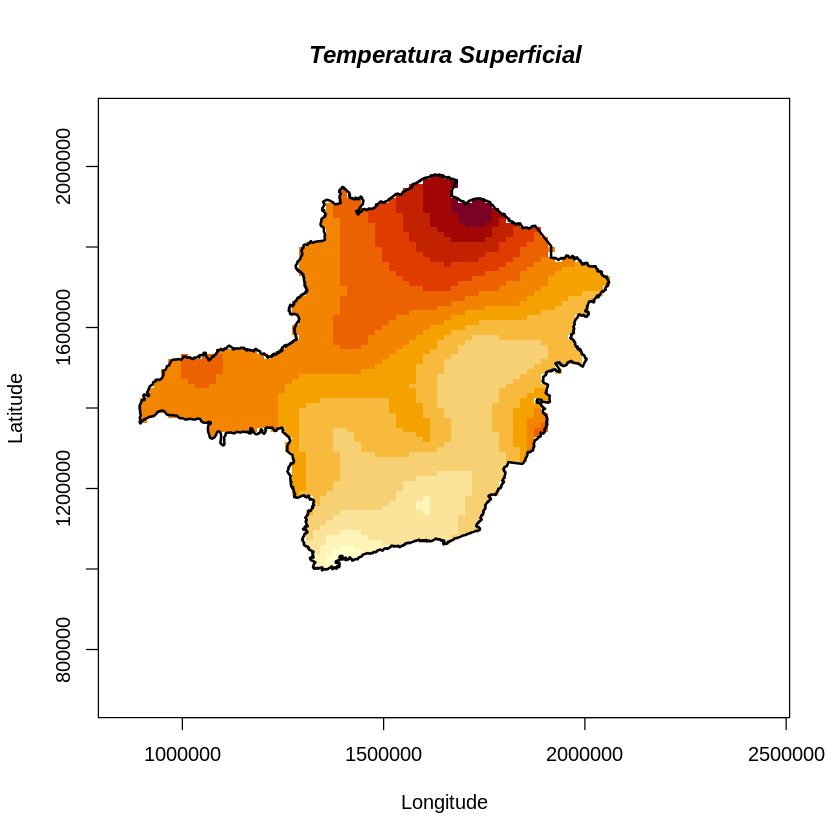

In [ ]:
image(kc, loc = loci, border = limite, val = kc$predict, xlab= 'Longitude', ylab='Latitude')
title(main = "Temperatura Superficial", font.main = 4)